In [44]:
%load_ext autoreload
%autoreload 2

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from experiment_mnist import *
from experiment_constant import *
from experiment_random import *
from scipy.special import expit
import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
p = 1e-2
K.clear_session()

# run with train dropout
#exp = MNISTExperiment([200, 200, 200, 100, 50], [p, 0, 0, 0, 0], 1, epochs = 100, activation = 'relu', reg_type = 0, do_print = True, train_dropout_l1 = p_train)

# run for regular MNIST
# exp = MNISTExperiment([200, 200, 200], [p, 0, 0], 1, epochs = 100, activation = 'relu', reg_type = 0, do_print = True)

# pfail at the first layer
# p = 0.01
#exp = MNISTExperiment([50, 50], [p, 0], 1, epochs = 50, activation = 'sigmoid', reg_type = 0, do_print = True)

# run with random weights
exp = RandomExperiment([50, 50, 50, 10], [p, 0], 1, activation = 'relu')

In [169]:
# x from the train dataset
#x0 = exp1.x_train[5].reshape(-1,1)

# random normal x
x0 = np.random.randn(exp.N[0], 1) * 3

In [170]:
exp.update_C(1000)

InvalidArgumentError: In[0] is not a matrix. Instead it has shape []
	 [[{{node dense_4/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_4_input_0_0/_37, dense_4/kernel/read)]]

In [173]:
exp.mean_per_neuron(exp.get_inputs(10))

[array([0.3898069 , 0.10701942, 0.2173368 , 0.2605462 , 0.4286093 ,
        0.43447083, 0.2084938 , 0.31376004, 0.15105876, 0.3018751 ,
        0.42790905, 0.28917202, 0.2842454 , 0.50370204, 0.334231  ,
        0.28612345, 0.35179415, 0.22245197, 0.284253  , 0.08604925,
        0.2410475 , 0.07097931, 0.42323804, 0.24703403, 0.47192273,
        0.37399903, 0.1279981 , 0.1454093 , 0.2569689 , 0.18720774,
        0.1663358 , 0.47213882, 0.29844296, 0.44346657, 0.20089264,
        0.3741207 , 0.07457691, 0.24463435, 0.23866852, 0.16056795,
        0.35537758, 0.12886646, 0.1865071 , 0.23760915, 0.3849718 ,
        0.11149869, 0.40810466, 0.23901081, 0.28435054, 0.35920733],
       dtype=float32),
 array([0.1451442 , 0.21502367, 0.00388253, 0.0324319 , 0.1665064 ,
        0.23576137, 0.1301283 , 0.24202368, 0.        , 0.40787178,
        0.26558617, 0.08187088, 0.18545526, 0.00727267, 0.10413034,
        0.16444579, 0.02272085, 0.3810473 , 0.08196273, 0.1280181 ,
        0.39272913, 0.08

In [153]:
R = np.eye(exp.N[-1])
for w in exp.W[1:][1::-1]:
    R = R @ np.abs(w.T)

array([0.13615375, 0.18763163, 0.17560902, 0.16839364, 0.14814888,
       0.1595809 , 0.16895257, 0.17686211, 0.13884028, 0.17657368])

True

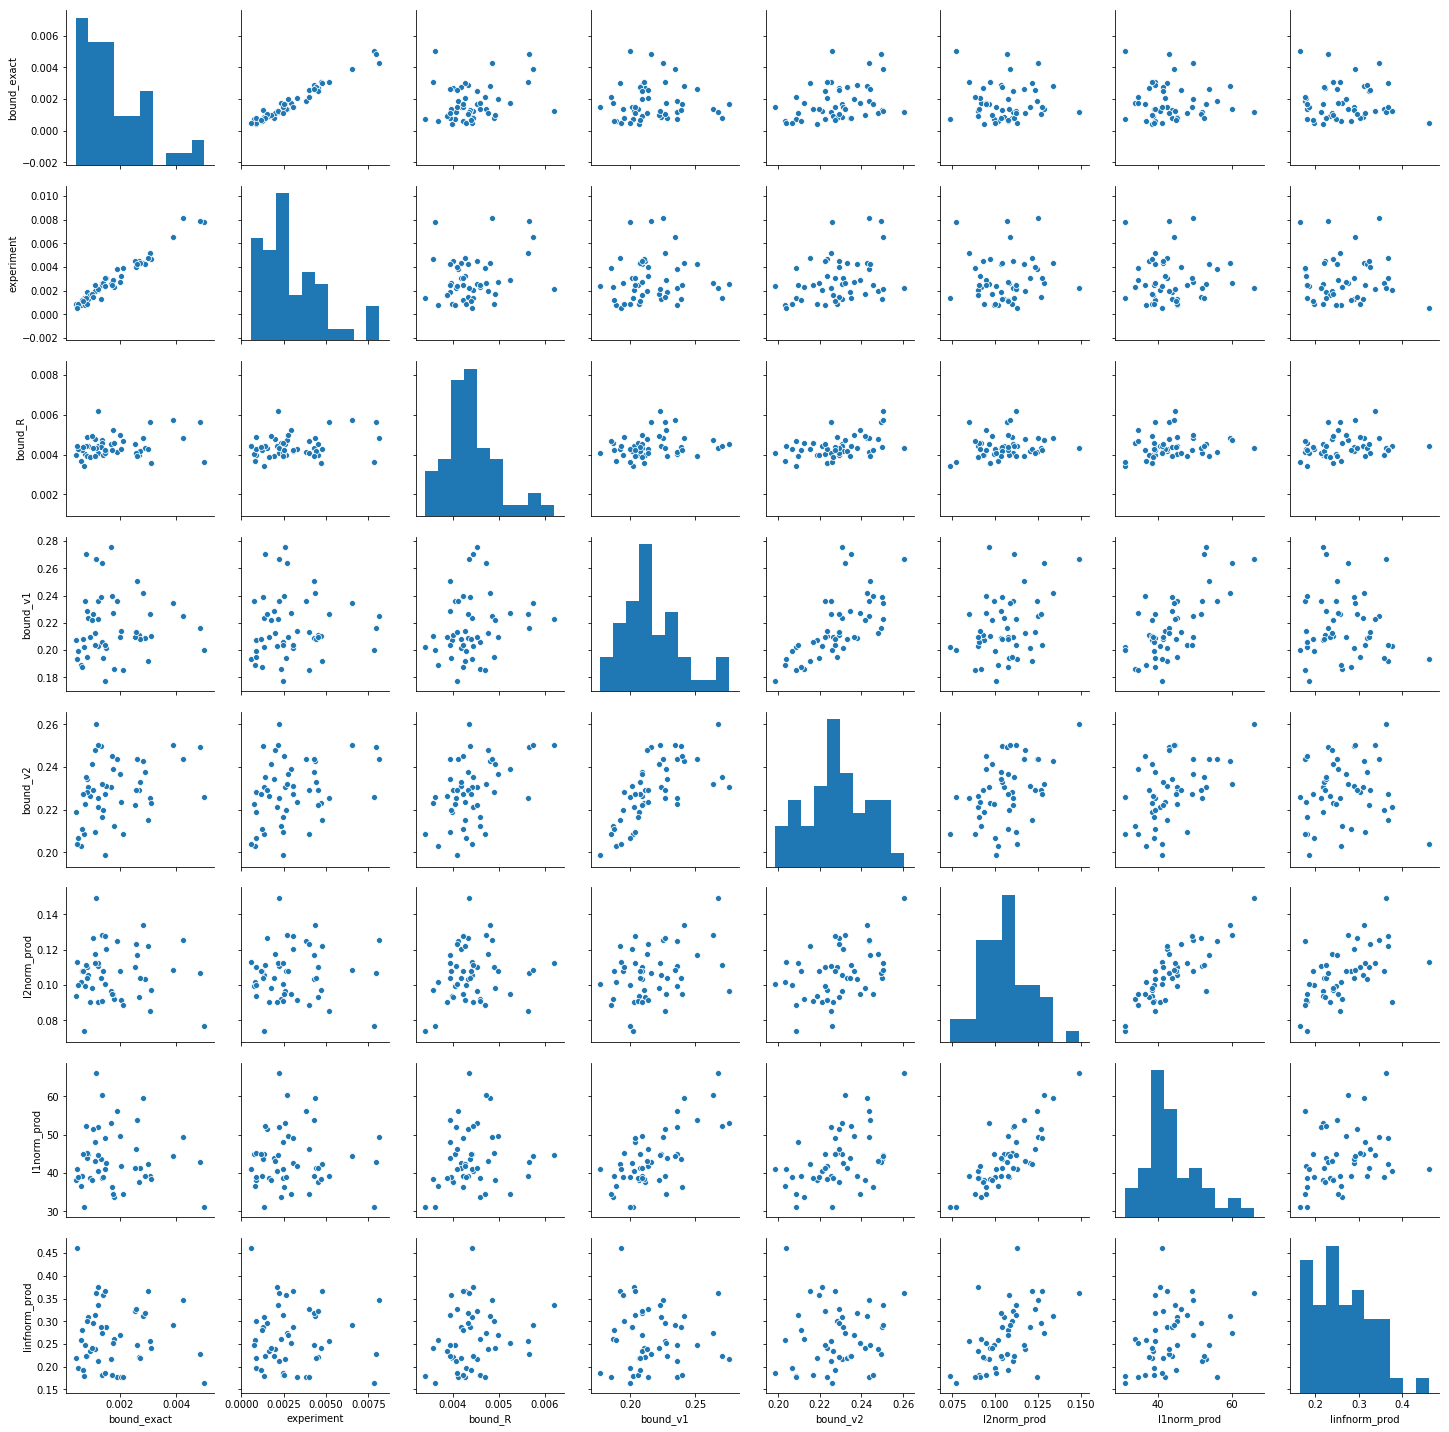

In [27]:
df = pd.DataFrame(data, columns = ['bound_exact', 'experiment', 'bound_R', 'bound_v1', 'bound_v2', 'l2norm_prod', 'l1norm_prod', 'linfnorm_prod'])
sns.pairplot(df)

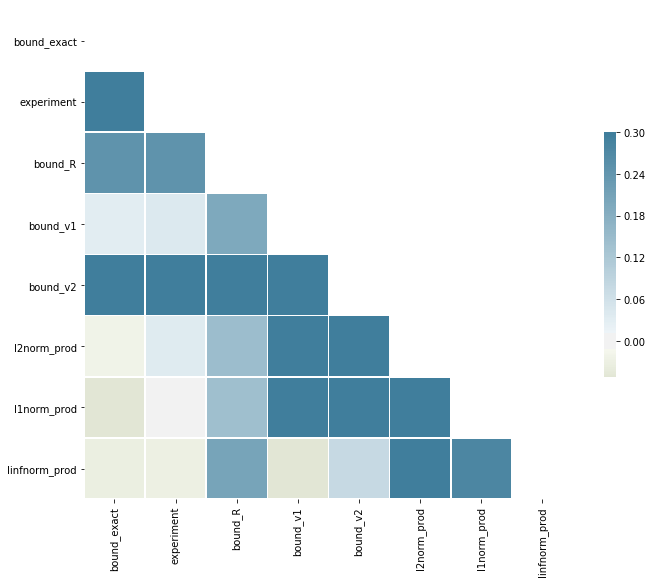

In [28]:
corr = df.corr()
corr
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})